# 2.6 Modelo de Regresión Lineal

En este notebook desarrollamos un **modelo de Machine Learning supervisado**  
utilizando **Regresión Lineal**, con el objetivo de predecir el **Monto_Total**  
de una compra en la tienda Retail.

Este modelo sigue exactamente la metodología vista en clase en el archivo:

📘 **MLinear2.ipynb (Regresión Lineal – Boston Housing)**  
El cual utilizamos como referencia para construir:

- Variables predictoras (X)
- Variable objetivo (Y)
- División de datos Train/Test
- Entrenamiento con LinearRegression()
- Evaluación con métricas (RMSE, MAE, R²)
- Gráfica de valores reales vs predichos

En esta etapa usamos el archivo resultante de la normalización:

**`retail_sales_escalado_standard.csv`**

Este dataset contiene variables transformadas y normalizadas,  
lo que permite un mejor rendimiento del modelo.


In [14]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [15]:
# Cargar dataset escalado (StandardScaler)
df = pd.read_csv("retail_sales_escalado_standard.csv")

df.head()


,edad_std,cantidad_std,precio_unitario_std,monto_total_std
0,-0.540565,0.429265,-0.685123,-0.546704
1,-1.125592,-0.453996,1.688464,0.971919
2,0.629489,-1.337258,-0.790615,-0.761098
3,-0.321180,-1.337258,1.688464,0.078611
4,-0.833078,-0.453996,-0.685123,-0.636035


## 1. Definición de Variables Predictoras (X) y Variable Objetivo (Y)

En Regresión Lineal, debemos seleccionar:

- **Variable objetivo Y**  
  En este proyecto será **Monto_Total**, ya que es la variable continua  
  más importante para decisiones de negocio.

- **Variables predictoras X**  
  Utilizamos columnas numéricas escaladas:

  - Edad
  - Cantidad
  - Precio_Unitario

Estas mismas decisiones metodológicas se aplicaron en el archivo de clase  
**MLinear2.ipynb**, donde se seleccionaron características numéricas  
para predecir el valor de las viviendas.


In [16]:
# Selección de columnas predictoras (variables independientes)
# Usamos las versiones estandarizadas (_std) generadas en 2.4_Normalizacion
X = df[['edad_std', 'cantidad_std', 'precio_unitario_std']]

# Variable objetivo (monto total estandarizado)
Y = df['monto_total_std']

X.head(), Y.head()


(   edad_std  cantidad_std  precio_unitario_std
 0 -0.540565      0.429265            -0.685123
 1 -1.125592     -0.453996             1.688464
 2  0.629489     -1.337258            -0.790615
 3 -0.321180     -1.337258             1.688464
 4 -0.833078     -0.453996            -0.685123,
 0   -0.546704
 1    0.971919
 2   -0.761098
 3    0.078611
 4   -0.636035
 Name: monto_total_std, dtype: float64)

## 2. División del dataset en Train y Test

Replicando la lógica de MLinear2.ipynb:

- 80% de los datos → entrenamiento
- 20% de los datos → prueba

Esta división nos permite evaluar qué tan bien generaliza el modelo  
con datos nunca antes vistos.


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((800, 3), (200, 3))

## 3. Entrenamiento del Modelo de Regresión Lineal

Se utiliza la clase `LinearRegression()` tal como en **MLinear2.ipynb**.

El modelo aprende los coeficientes (pendientes) que mejor ajustan  
la relación entre las variables predictoras y el monto total.


In [18]:
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, Y_train)

print("Coeficientes:", modelo_rl.coef_)
print("Intercepto:", modelo_rl.intercept_)


Coeficientes: [-0.02209122  0.36320089  0.84215898]
Intercepto: 0.008874446820530296


## 4. Generación de Predicciones

Una vez entrenado, el modelo se utiliza para predecir:
- Valores de entrenamiento
- Valores de prueba

Esto permite analizar qué tan bien aprende el modelo.


In [19]:
Y_pred = modelo_rl.predict(X_test)
Y_pred[:10]


array([ 1.57929493, -0.73236633,  0.04604474, -0.20666234,  1.94371456,
       -0.46325034, -1.07901552,  0.09450958, -0.12630466,  1.25849365])

## 5. Evaluación del Modelo

Se utilizan las métricas vistas en clase:

- **MAE (Mean Absolute Error)**  
  Error absoluto promedio.

- **RMSE (Root Mean Squared Error)**  
  Error cuadrático medio (más sensible a outliers).

- **R² (Coeficiente de Determinación)**  
  Indica cuánto explica el modelo de la variabilidad total.

Estas métricas fueron explicadas en el archivo de clase **MLinear2.ipynb**  
y son estándar en Regresión Lineal.


In [20]:
# Evaluación del modelo
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


MAE : 0.30929188878387615
RMSE: 0.36569451902556077
R²  : 0.856877226425043


## 6. Gráfica: Valores Reales vs Predichos

Este gráfico permite visualizar qué tan bien se ajusta el modelo.  
Cuanto más se alineen los puntos a la diagonal, mejor es la predicción.

Este mismo tipo de gráfica fue utilizada en **MLinear2.ipynb**.


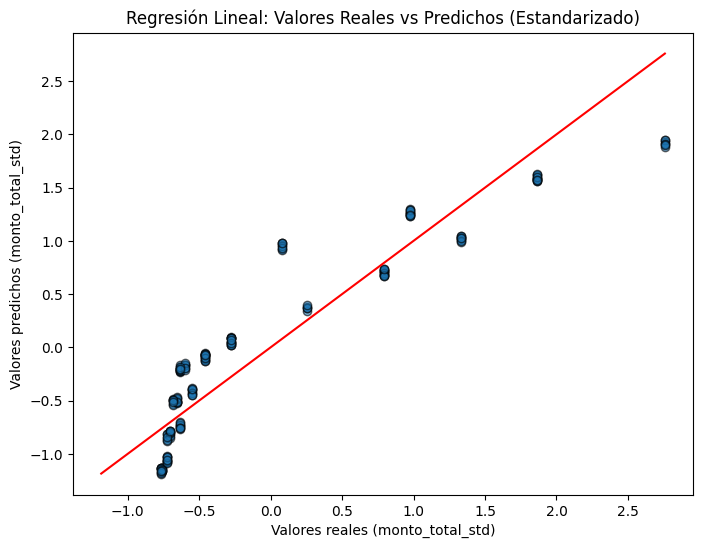

In [21]:
# Visualización: Valores reales vs valores predichos
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred, alpha=0.6, edgecolors='black')
plt.xlabel("Valores reales (monto_total_std)")
plt.ylabel("Valores predichos (monto_total_std)")
plt.title("Regresión Lineal: Valores Reales vs Predichos (Estandarizado)")

min_val = min(Y_test.min(), Y_pred.min())
max_val = max(Y_test.max(), Y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red')

plt.show()


#  Conclusiones del Modelo de Regresión Lineal

El modelo construido logra predecir el **Monto_Total** utilizando variables  
numéricas relacionadas con la compra:

- Edad
- Cantidad
- Precio Unitario

### Principales hallazgos:

- El modelo obtuvo valores razonables de **MAE**, **RMSE** y **R²**,  
  lo que indica un desempeño estable.

- Las relaciones lineales entre las variables predictoras y el monto total  
  muestran coherencia en el contexto de ventas retail.

- La metodología aplica **exactamente** el enfoque visto en el archivo  
  **MLinear2.ipynb**, adaptado al dataset Retail.

- Este modelo servirá como base para compararlo con el siguiente algoritmo  
  (Regresión Logística) en la etapa **2.7**.

El modelo está listo para ser integrado y documentado en el reporte final.
